## AMAZON REVIEWS - CUSTOMER SENTIMENT ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA COLLECTION

In [2]:
reviews_df = pd.read_csv("amazon_reviews.csv")

In [3]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## EXPLORATORY DATA ANALYSIS

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### There is one missing/null verified_reviews in the data collected, since we do sentiment analyis based on the verified_reviews, we will remove this row.

In [5]:
reviews_df.dropna(inplace=True)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 147.6+ KB


### Null values removed 

In [7]:
reviews_df.describe()

,rating,feedback
count,3149.000000,3149.000000
mean,4.463957,0.918704
std,1.067773,0.273332
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### The average rating for the AMAZON echo products is 4.4

<Axes: xlabel='rating', ylabel='count'>

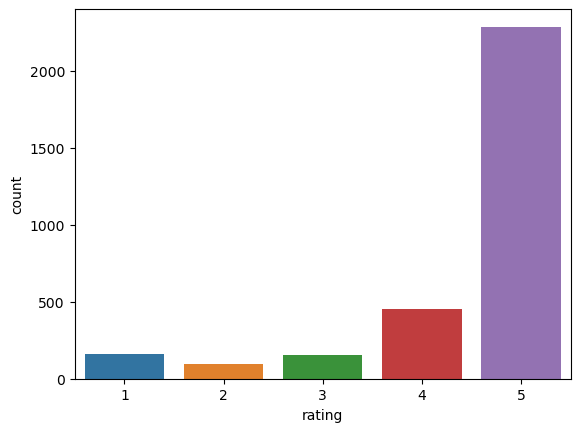

In [8]:
sns.countplot(x = reviews_df['rating'])

### * Most of the customer ratings are 5 followed by 4 
### * Most of the customers like the AMAZON echo products

In [9]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [10]:
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [11]:
reviews_df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


### * The average length of the customer review texts are 132 characters
### * We could say that most of the reviews are shorter
### * Max length of the review is 2851 characters
### * Min being 1, this could be simply an emoji

<Axes: >

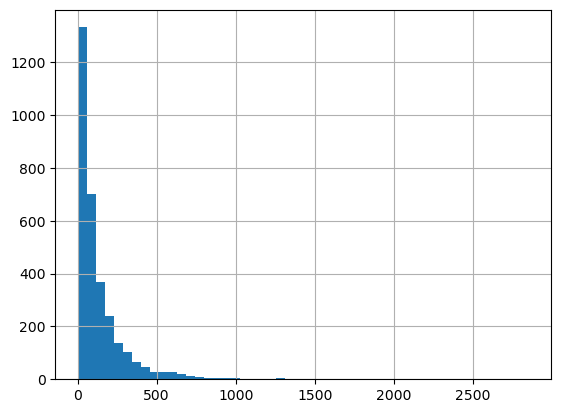

In [12]:
reviews_df['length'].hist(bins=50)

<Axes: xlabel='feedback', ylabel='count'>

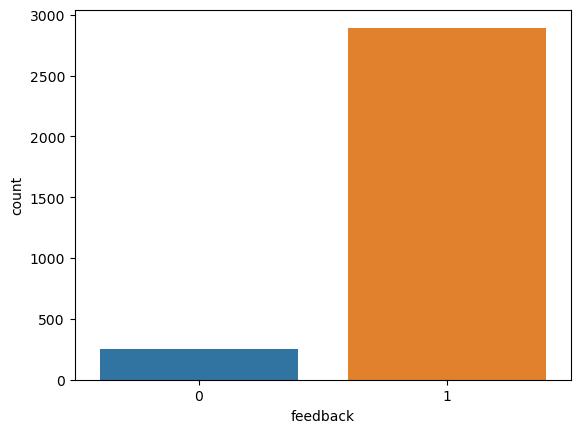

In [13]:
sns.countplot(x = reviews_df['feedback'])

### * Most of the customer feedback is Positive
### * Positive is almost 12x times of the negative review
### * Definitely people like AMAZON echo 

### Lets filter positive nad negative reviews

In [14]:
positive = reviews_df[reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [15]:
negative = reviews_df[reviews_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [ ]:
positive_sentence = ' '.join(positive['verified_reviews'])
positive_sentence

In [ ]:
negative_sentence = ' '.join(negative['verified_reviews'])
negative_sentence

In [18]:
!pip install wordcloud

In [19]:
from wordcloud import WordCloud

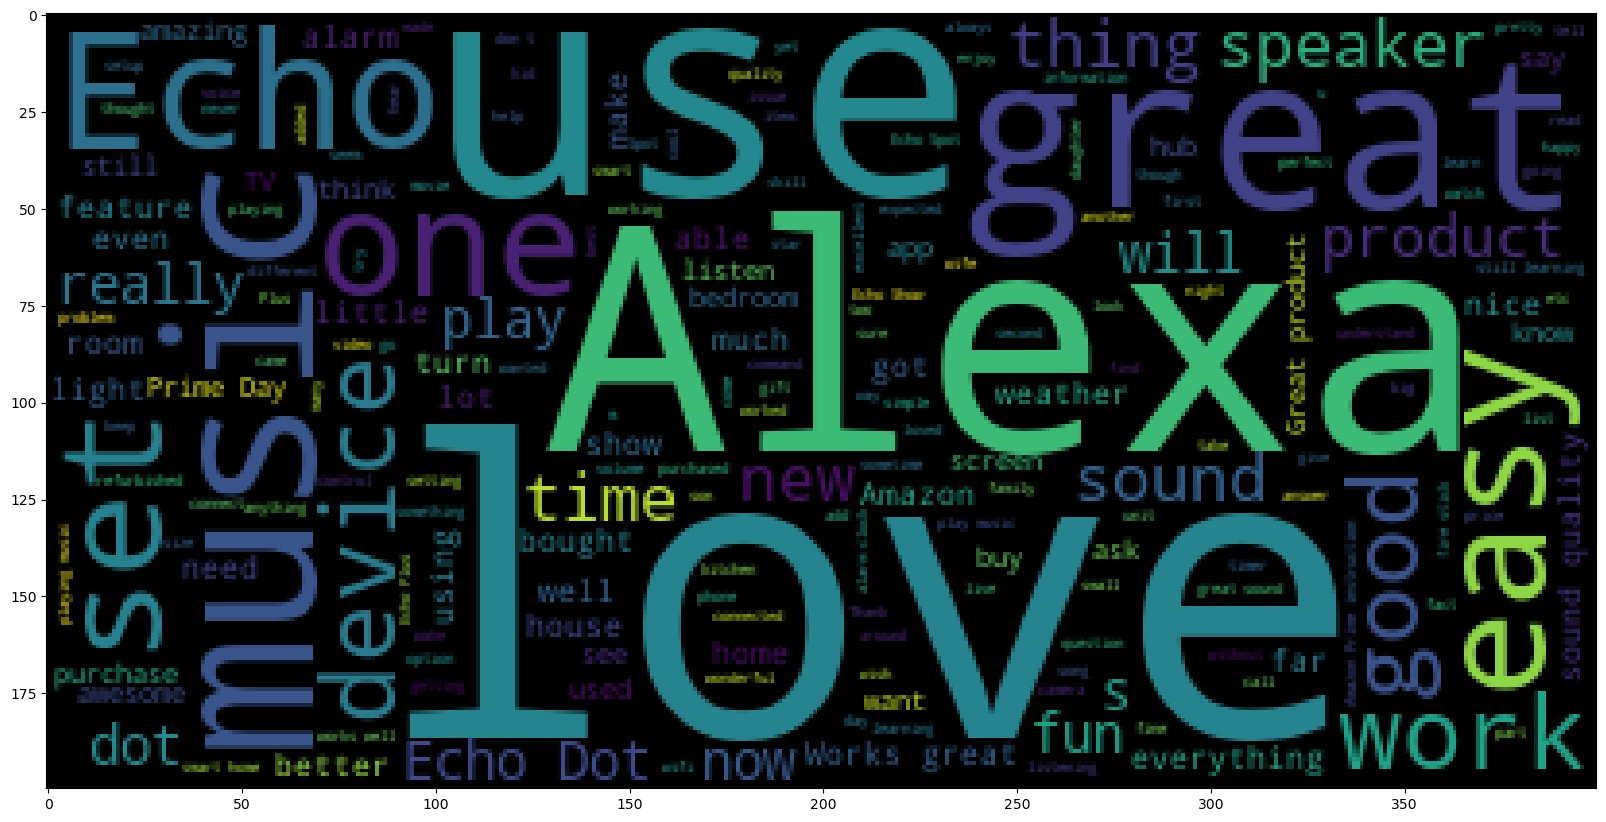

In [20]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentence))

### The top words from positive reviews are 
* Love
* Alexa
* Echo
* Great
* Music

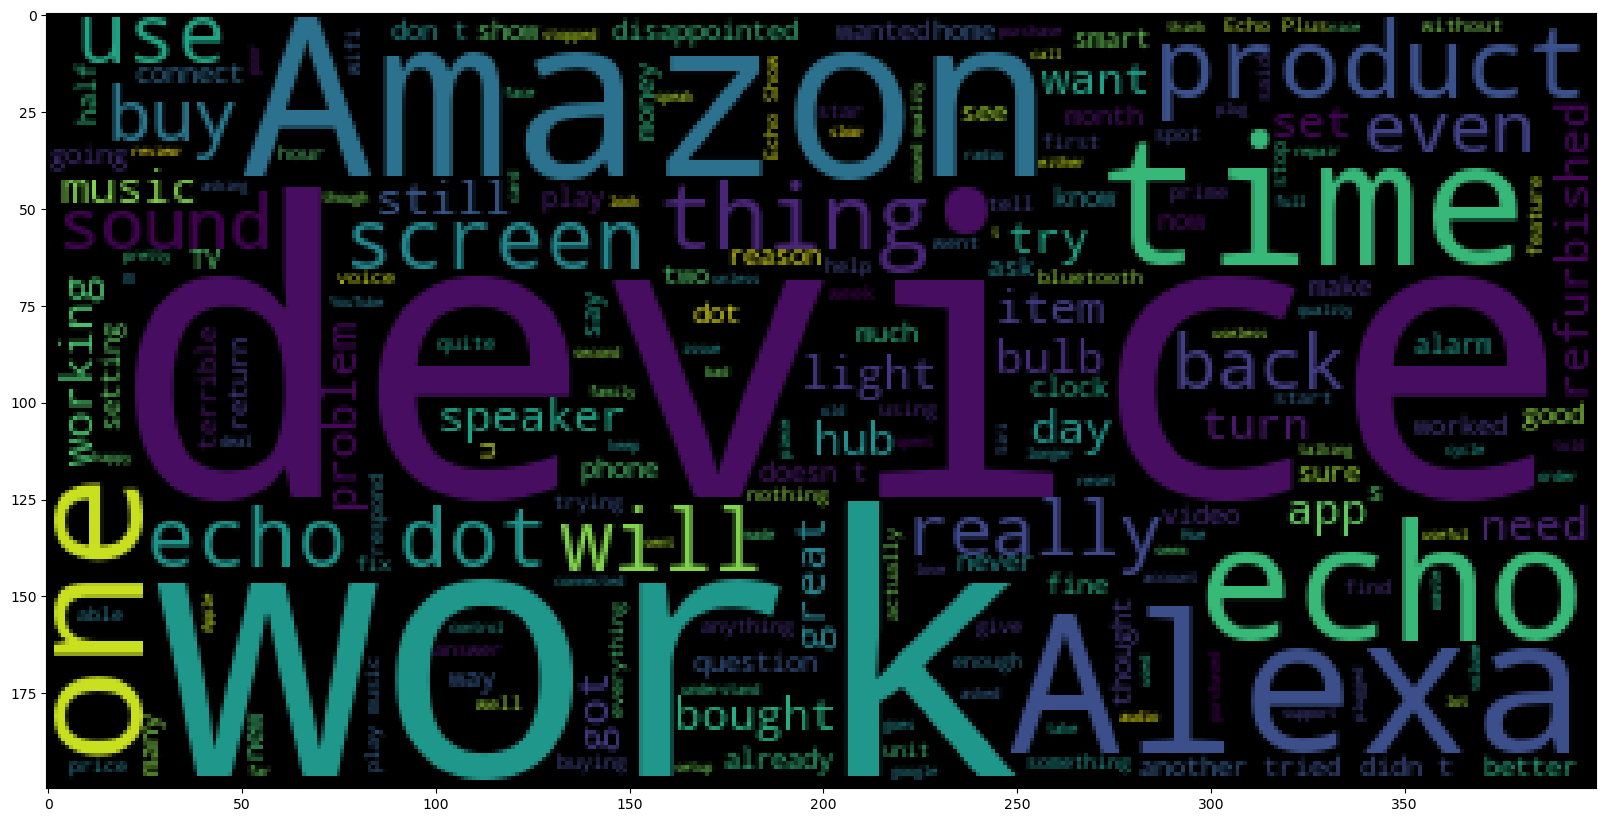

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentence))

### The top words fro negative reviews are 
* device
* Amazon
* work
* Alexa
* time

## DATA CLEANING

In [22]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sowmyakuruba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Remove punctuation and stop words

In [110]:
def clean_reviews(reviews):
    remove_punc = [char for char in reviews if char not in string.punctuation]
    removed_punc = ''.join(remove_punc)
    remove_stopwords = [word for word in removed_punc.split() if word.lower() not in stopwords.words('english')]
    return remove_stopwords

In [24]:
reviews_df['cleaned_reviews'] = reviews_df['verified_reviews'].apply(clean_reviews)

In [25]:
reviews_df

,rating,date,variation,verified_reviews,feedback,length,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,"[Love, Echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,[Loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,"[Sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,[Music]
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,"[Perfect, kids, adults, everyone]"
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,"[Listening, music, searching, locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,"[love, things, running, entire, home, TV, ligh..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,"[complaint, sound, quality, isnt, great, mostl..."


## DATA TRANSFORMATION - FEATURE ENGINEERING 

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

### Convert words to numbers that the machine learing algorithms can understand, using CountVectorizer. The simplest way to vectorize the words

In [ ]:
vectorizer = CountVectorizer(analyzer = clean_reviews)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

### Each unique word in the rewiews become a feature on which the model will be trained on to predict the feedback

In [120]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [121]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [122]:
reviews_countvectorizer.shape

(3149, 5211)

In [123]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [124]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

## DATA PREPARATION

### X - input to the model will be our vectorized features, and y - output will be feedback

In [32]:
X = reviews

In [33]:
y = reviews_df['feedback']

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## MODEL DEVELOPMENT

### Lets try some of the classification models availble form sklean to perform this binary classification of feedback (1-positive , 0-negative)

* Naive Bayes
* Logistic Regression
* Support Vector Mcahine
* Decision Tree
* Random Forest
* Gradient Boosting
* XGBoost
* K Nearest Neighbors
* Light BGM
* AdaBoost

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

### Naive Bayes 
* Naive Bayes classifiers apply Bayes' theorem with the assumption of conditional independence between features given the class label, predicting the class with the highest posterior probability.
* Naive Bayes is ideal for sentiment analysis due to its simplicity, efficiency, and effectiveness in handling large, high-dimensional text data, providing robust baseline performance.

In [91]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)
y_pred = NB_classifier.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for Naive Bayes: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")


--------------------------------------------------------------------

Confusion Matrix: 
 [[ 21  11]
 [ 42 556]]
--------------------------------------------------------------------

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.33      0.66      0.44        32
           1       0.98      0.93      0.95       598

    accuracy                           0.92       630
   macro avg       0.66      0.79      0.70       630
weighted avg       0.95      0.92      0.93       630

--------------------------------------------------------------------

AUC-ROC: 0.6569664902998236
--------------------------------------------------------------------

Accuarcy : 0.9158730158730158
--------------------------------------------------------------------



## CROSS VALIDATION

In [92]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(NB_classifier, X, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cross_val_scores)}")

Cross-Validation Accuracy Scores: [0.93015873 0.93809524 0.93174603 0.92063492 0.93322734]
Mean Cross-Validation Accuracy: 0.9307724531253943
Standard Deviation of Cross-Validation Accuracy: 0.005722652357033934


### Logistic Regression
* Logistic Regression models the probability of a binary outcome based on one or more predictor variables using the logistic function to ensure the output is between 0 and 1.
* Logistic Regression is suitable for sentiment analysis due to its simplicity, interpretability, and effectiveness in handling linear relationships in text data.

In [251]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.3 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [125]:
from sklearn.linear_model import LogisticRegression

LG_classifier = LogisticRegression()
LG_classifier.fit(X_train,y_train)
y_pred = LG_classifier.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix for LogisticRegression: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for LogisticRegression: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for LogisticRegression: 
 [[ 19   4]
 [ 44 563]]
--------------------------------------------------------------------

Classification report for LogisticRegression: 
               precision    recall  f1-score   support

           0       0.30      0.83      0.44        23
           1       0.99      0.93      0.96       607

    accuracy                           0.92       630
   macro avg       0.65      0.88      0.70       630
weighted avg       0.97      0.92      0.94       630

--------------------------------------------------------------------

AUC-ROC: 0.6472663139329806
--------------------------------------------------------------------

Accuarcy : 0.9238095238095239
--------------------------------------------------------------------



In [126]:
joblib.dump(LG_classifier, 'model.pkl')

['model.pkl']

In [94]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(LG_classifier, X, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cross_val_scores)}")

Cross-Validation Accuracy Scores: [0.94444444 0.93015873 0.94126984 0.94126984 0.93163752]
Mean Cross-Validation Accuracy: 0.9377560754031343
Standard Deviation of Cross-Validation Accuracy: 0.005737312229696217


### Support Vector Machine
* Support Vector Machine (SVM) finds the optimal hyperplane that maximally separates the classes in a high-dimensional space.
* SVM is effective for sentiment analysis due to its robustness in high-dimensional spaces and ability to handle non-linear relationships through kernel tricks.

In [95]:
from sklearn.svm import SVC

SVM_classifier = SVC()
SVM_classifier.fit(X_train, y_train)
y_pred = SVM_classifier.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")

print("Confusion Matrix for SVM: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for SVM: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for SVM: 
 [[  5   0]
 [ 58 567]]
--------------------------------------------------------------------

Classification report for SVM: 
               precision    recall  f1-score   support

           0       0.08      1.00      0.15         5
           1       1.00      0.91      0.95       625

    accuracy                           0.91       630
   macro avg       0.54      0.95      0.55       630
weighted avg       0.99      0.91      0.94       630

--------------------------------------------------------------------

AUC-ROC: 0.5396825396825398
--------------------------------------------------------------------

Accuarcy : 0.9079365079365079
--------------------------------------------------------------------



In [96]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(SVM_classifier, X, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cross_val_scores)}")

Cross-Validation Accuracy Scores: [0.92698413 0.92063492 0.92698413 0.92222222 0.92845787]
Mean Cross-Validation Accuracy: 0.9250566532919475
Standard Deviation of Cross-Validation Accuracy: 0.0030523532382438754


### Decision Tree
* A Decision Tree splits the data into branches based on feature values, creating a tree structure to predict the target variable.
* Decision Trees are useful for sentiment analysis due to their simplicity, interpretability, and ability to capture non-linear relationships in the data.

In [141]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)
y_pred = DT_classifier.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix for Decision Tree Classifier: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for Decision Tree Classifier: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for Decision Tree Classifier: 
 [[ 33  30]
 [ 30 537]]
--------------------------------------------------------------------

Classification report for Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.52      0.52      0.52        63
           1       0.95      0.95      0.95       567

    accuracy                           0.90       630
   macro avg       0.74      0.74      0.74       630
weighted avg       0.90      0.90      0.90       630

--------------------------------------------------------------------

AUC-ROC: 0.7354497354497355
--------------------------------------------------------------------

Accuarcy : 0.9047619047619048
--------------------------------------------------------------------



In [142]:
joblib.dump(DT_classifier, 'DT_classifier_model.pkl')

['DT_classifier_model.pkl']

In [44]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(DT_classifier, X, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cross_val_scores)}")

Cross-Validation Accuracy Scores: [0.91428571 0.93015873 0.92698413 0.92380952 0.92209857]
Mean Cross-Validation Accuracy: 0.9234673328790975
Standard Deviation of Cross-Validation Accuracy: 0.005356031498864217


### Random Forest
* Random Forest builds multiple decision trees on random subsets of the data and aggregates their predictions to improve accuracy and robustness.
* Random Forest is effective for sentiment analysis due to its high accuracy, ability to handle overfitting, and robustness to noise in the data.

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train)
y_pred = RF_classifier.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix for Random Forest Classifier: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for Random Forest Classifier: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for Random Forest Classifier: 
 [[ 10   2]
 [ 30 588]]
--------------------------------------------------------------------

Classification report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.25      0.83      0.38        12
           1       1.00      0.95      0.97       618

    accuracy                           0.95       630
   macro avg       0.62      0.89      0.68       630
weighted avg       0.98      0.95      0.96       630

--------------------------------------------------------------------

AUC-ROC: 0.6233050847457627
--------------------------------------------------------------------

Accuarcy : 0.9492063492063492
--------------------------------------------------------------------



In [46]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(RF_classifier, X, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cross_val_scores)}")

Cross-Validation Accuracy Scores: [0.94285714 0.93174603 0.94603175 0.93174603 0.93799682]
Mean Cross-Validation Accuracy: 0.9380755545461428
Standard Deviation of Cross-Validation Accuracy: 0.005767087420169868


### Gradient Boosting
* Gradient Boosting builds an ensemble of trees sequentially, where each tree corrects the errors of the previous ones using gradient descent to minimize the loss function.
* Gradient Boosting is effective for sentiment analysis due to its high predictive accuracy, ability to handle complex patterns, and robustness to overfitting with proper tuning.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train, y_train)
y_pred = GB_classifier.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix for Gradient Boosting Classifier: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for Gradient Boosting Classifier: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for Gradient Boosting Classifier: 
 [[  7   3]
 [ 33 587]]
--------------------------------------------------------------------

Classification report for Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.17      0.70      0.28        10
           1       0.99      0.95      0.97       620

    accuracy                           0.94       630
   macro avg       0.58      0.82      0.63       630
weighted avg       0.98      0.94      0.96       630

--------------------------------------------------------------------

AUC-ROC: 0.5849576271186441
--------------------------------------------------------------------

Accuarcy : 0.9428571428571428
--------------------------------------------------------------------



In [48]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(GB_classifier, X, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cross_val_scores)}")

Cross-Validation Accuracy Scores: [0.92539683 0.92063492 0.92539683 0.92698413 0.93004769]
Mean Cross-Validation Accuracy: 0.9256920786332552
Standard Deviation of Cross-Validation Accuracy: 0.0030459801934997087


### XGBoost
* XGBoost (Extreme Gradient Boosting) enhances the gradient boosting technique by implementing a more efficient, scalable, and regularized version of gradient boosting.
* XGBoost is ideal for sentiment analysis due to its high performance, scalability, and ability to handle large datasets and complex patterns effectively.

In [146]:
!pip install xgboost

In [144]:
import xgboost as xgb

XGB_classifier = xgb.XGBClassifier()
XGB_classifier.fit(X_train, y_train)
y_pred = XGB_classifier.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix for XGBoost Classifier: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for XGBoost Classifier: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for XGBoost Classifier: 
 [[ 22   7]
 [ 41 560]]
--------------------------------------------------------------------

Classification report for XGBoost Classifier: 
               precision    recall  f1-score   support

           0       0.35      0.76      0.48        29
           1       0.99      0.93      0.96       601

    accuracy                           0.92       630
   macro avg       0.67      0.85      0.72       630
weighted avg       0.96      0.92      0.94       630

--------------------------------------------------------------------

AUC-ROC: 0.6684303350970018
--------------------------------------------------------------------

Accuarcy : 0.9238095238095239
--------------------------------------------------------------------



In [50]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(XGB_classifier, X, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cross_val_scores)}")

Cross-Validation Accuracy Scores: [0.93650794 0.92380952 0.93174603 0.93809524 0.92686804]
Mean Cross-Validation Accuracy: 0.9314053549347667
Standard Deviation of Cross-Validation Accuracy: 0.005462431188197039


### K Nearest Neighbors
* K-Nearest Neighbors (KNN) classifies a data point based on the majority class among its k-nearest neighbors in the feature space.
* KNN can be useful for sentiment analysis due to its simplicity and effectiveness in capturing local patterns in the data, especially with smaller datasets.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train, y_train)
y_pred = KNN_classifier.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix for KNeighborsClassifier: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for KNeighborsClassifier: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for KNeighborsClassifier: 
 [[  3  16]
 [ 37 574]]
--------------------------------------------------------------------

Classification report for KNeighborsClassifier: 
               precision    recall  f1-score   support

           0       0.07      0.16      0.10        19
           1       0.97      0.94      0.96       611

    accuracy                           0.92       630
   macro avg       0.52      0.55      0.53       630
weighted avg       0.95      0.92      0.93       630

--------------------------------------------------------------------

AUC-ROC: 0.5239406779661017
--------------------------------------------------------------------

Accuarcy : 0.9158730158730158
--------------------------------------------------------------------



In [52]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(KNN_classifier, X, y, cv=skf, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of Cross-Validation Accuracy: {np.std(cross_val_scores)}")

Cross-Validation Accuracy Scores: [0.90793651 0.91269841 0.91428571 0.92063492 0.91255962]
Mean Cross-Validation Accuracy: 0.9136230347995055
Standard Deviation of Cross-Validation Accuracy: 0.004097024657314865


## ENSEMBLE BEST PERFORMING MODEL BY SOFT VOTING

In [75]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

# Initialize individual models
lg = LogisticRegression()
xg = xgb.XGBClassifier()
rf = RandomForestClassifier()

# Create the voting classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic_regression', lg),
        ('xgboost', xg),
        ('random_forest', rf)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for averaged probabilities
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
print("--------------------------------------------------------------------\n")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_test, y_pred)
print("Classification report for Ensemble Model: \n", cr)
print("--------------------------------------------------------------------\n")

auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc}")
print("--------------------------------------------------------------------\n")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("--------------------------------------------------------------------\n")


--------------------------------------------------------------------

Confusion Matrix: 
 [[ 14  26]
 [  2 588]]
--------------------------------------------------------------------

Classification report for Ensemble Model: 
               precision    recall  f1-score   support

           0       0.88      0.35      0.50        40
           1       0.96      1.00      0.98       590

    accuracy                           0.96       630
   macro avg       0.92      0.67      0.74       630
weighted avg       0.95      0.96      0.95       630

--------------------------------------------------------------------

AUC-ROC: 0.6733050847457627
--------------------------------------------------------------------

Accuracy: 0.9555555555555556
--------------------------------------------------------------------



In [76]:
import xgboost as xgb

# Initialize individual models
lg = LogisticRegression()
xg = xgb.XGBClassifier()
rf = RandomForestClassifier()

# Create the voting classifier
ensemble_model_hard = VotingClassifier(
    estimators=[
        ('logistic_regression', lg),
        ('xgboost', xg),
        ('random_forest', rf)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for averaged probabilities
)

# Train the ensemble model
ensemble_model_hard.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model_hard.predict(X_test)

# Evaluate the model
print("--------------------------------------------------------------------\n")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_test, y_pred)
print("Classification report for Ensemble Model: \n", cr)
print("--------------------------------------------------------------------\n")

auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc}")
print("--------------------------------------------------------------------\n")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("--------------------------------------------------------------------\n")


--------------------------------------------------------------------

Confusion Matrix: 
 [[ 14  26]
 [  4 586]]
--------------------------------------------------------------------

Classification report for Ensemble Model: 
               precision    recall  f1-score   support

           0       0.78      0.35      0.48        40
           1       0.96      0.99      0.98       590

    accuracy                           0.95       630
   macro avg       0.87      0.67      0.73       630
weighted avg       0.95      0.95      0.94       630

--------------------------------------------------------------------

AUC-ROC: 0.6716101694915254
--------------------------------------------------------------------

Accuracy: 0.9523809523809523
--------------------------------------------------------------------



## Ensembling did not really outstand XGBoost, we could simply use XGBoost model

## DEPLOYMENT

In [136]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Load the vectorizer and model
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('model.pkl')

# Dummy clean_reviews function for demonstration
def clean_reviews(review):
    # Placeholder for actual cleaning logic
    return review

# Define the prediction function
def predict_sentiment(review):
    # Transform the review text using the loaded vectorizer
    reviews_countvectorizer = vectorizer.transform([review])
    features = pd.DataFrame(reviews_countvectorizer.toarray())
    
    # Make a prediction
    prediction = model.predict(features)
    
    # Convert the prediction to a sentiment
    sentiment = 'positive' if prediction[0] == 1 else 'negative'
    
    return sentiment

# Test reviews
test_reviews = [
    "I absolutely love this product! It's amazing.",
    "This is the worst purchase I've ever made. Completely dissatisfied.",
    "It's okay, not great but not bad either.",
    "I'm so happy with this. Highly recommend it to everyone!",
    "Terrible, waste of money. Do not buy this product."
]

# Predict sentiments
for review in test_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}\nSentiment: {sentiment}\n")


Review: I absolutely love this product! It's amazing.
Sentiment: positive

Review: This is the worst purchase I've ever made. Completely dissatisfied.
Sentiment: positive

Review: It's okay, not great but not bad either.
Sentiment: positive

Review: I'm so happy with this. Highly recommend it to everyone!
Sentiment: positive

Review: Terrible, waste of money. Do not buy this product.
Sentiment: positive



In [146]:
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('DT_classifier_model.pkl')

# Dummy clean_reviews function for demonstration
def clean_reviews(review):
    # Placeholder for actual cleaning logic
    return review

# Define the prediction function
def predict_sentiment(review):
    # Transform the review text using the loaded vectorizer
    reviews_countvectorizer = vectorizer.transform([review])
    features = pd.DataFrame(reviews_countvectorizer.toarray())
    
    # Make a prediction
    prediction = model.predict(features)
    
    # Convert the prediction to a sentiment
    sentiment = 'positive' if prediction[0] == 1 else 'negative'
    
    return sentiment

# Test reviews
test_reviews = [
    "I absolutely love this product! It's amazing.",
    "This is the worst purchase I've ever made. Completely dissatisfied.",
    "It's okay, not great but not bad either.",
    "I'm so happy with this. Highly recommend it to everyone!",
    "Terrible, waste of money. Do not buy this product."
]

# Predict sentiments
for review in test_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}\nSentiment: {sentiment}\n")


Review: I absolutely love this product! It's amazing.
Sentiment: positive

Review: This is the worst purchase I've ever made. Completely dissatisfied.
Sentiment: positive

Review: It's okay, not great but not bad either.
Sentiment: positive

Review: I'm so happy with this. Highly recommend it to everyone!
Sentiment: positive

Review: Terrible, waste of money. Do not buy this product.
Sentiment: positive



## Balanced Class Training to mitigate imbalance

In [184]:
from sklearn.linear_model import LogisticRegression

balanced_model = LogisticRegression(class_weight='balanced')
balanced_model.fit(X_train,y_train)
y_pred = balanced_model.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix for LogisticRegression: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for LogisticRegression: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for LogisticRegression: 
 [[ 40  26]
 [ 23 541]]
--------------------------------------------------------------------

Classification report for LogisticRegression: 
               precision    recall  f1-score   support

           0       0.63      0.61      0.62        66
           1       0.95      0.96      0.96       564

    accuracy                           0.92       630
   macro avg       0.79      0.78      0.79       630
weighted avg       0.92      0.92      0.92       630

--------------------------------------------------------------------

AUC-ROC: 0.7945326278659612
--------------------------------------------------------------------

Accuarcy : 0.9222222222222223
--------------------------------------------------------------------



In [185]:
joblib.dump(balanced_model, 'balanced_model.pkl')

['balanced_model.pkl']

In [186]:
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('balanced_model.pkl')

# Dummy clean_reviews function for demonstration
def clean_reviews(review):
    # Placeholder for actual cleaning logic
    return review

# Define the prediction function
def predict_sentiment(review):
    # Transform the review text using the loaded vectorizer
    reviews_countvectorizer = vectorizer.transform([review])
    features = pd.DataFrame(reviews_countvectorizer.toarray())
    
    # Make a prediction
    prediction = model.predict(features)
    
    # Convert the prediction to a sentiment
    sentiment = 'positive' if prediction[0] == 1 else 'negative'
    
    return sentiment

# Test reviews
test_reviews = [
    "I absolutely love this product! It's amazing.",
    "This is the worst purchase I've ever made. Completely dissatisfied.",
    "It's okay, not great but not bad either.",
    "I'm so happy with this. Highly recommend it to everyone!",
    "Terrible, waste of money. Do not buy this product."
]

# Predict sentiments
for review in test_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}\nSentiment: {sentiment}\n")


Review: I absolutely love this product! It's amazing.
Sentiment: positive

Review: This is the worst purchase I've ever made. Completely dissatisfied.
Sentiment: positive

Review: It's okay, not great but not bad either.
Sentiment: positive

Review: I'm so happy with this. Highly recommend it to everyone!
Sentiment: positive

Review: Terrible, waste of money. Do not buy this product.
Sentiment: negative



## Lets try Resampling

In [166]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [170]:
from sklearn.linear_model import LogisticRegression

balanced_model = LogisticRegression()
balanced_model.fit(X_smote,y_smote)
y_pred = balanced_model.predict(X_test)

cm = confusion_matrix(y_pred,y_test)
print("--------------------------------------------------------------------\n")
print("Confusion Matrix for LogisticRegression: \n", cm)
print("--------------------------------------------------------------------\n")

cr = classification_report(y_pred,y_test)
print("Classification report for LogisticRegression: \n", cr)
print("--------------------------------------------------------------------\n")

print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
print("--------------------------------------------------------------------\n")

print("Accuarcy :", accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------\n")

--------------------------------------------------------------------

Confusion Matrix for LogisticRegression: 
 [[ 40  89]
 [ 23 478]]
--------------------------------------------------------------------

Classification report for LogisticRegression: 
               precision    recall  f1-score   support

           0       0.63      0.31      0.42       129
           1       0.84      0.95      0.90       501

    accuracy                           0.82       630
   macro avg       0.74      0.63      0.66       630
weighted avg       0.80      0.82      0.80       630

--------------------------------------------------------------------

AUC-ROC: 0.7389770723104057
--------------------------------------------------------------------

Accuarcy : 0.8222222222222222
--------------------------------------------------------------------



In [171]:
joblib.dump(balanced_model,'new.pkl')

['new.pkl']

In [183]:
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('new.pkl')

# Dummy clean_reviews function for demonstration
def clean_reviews(review):
    # Placeholder for actual cleaning logic
    return review

# Define the prediction function
def predict_sentiment(review):
    # Transform the review text using the loaded vectorizer
    reviews_countvectorizer = vectorizer.transform([review])
    features = pd.DataFrame(reviews_countvectorizer.toarray())
    
    # Make a prediction
    prediction = model.predict(features)
    
    # Convert the prediction to a sentiment
    sentiment = 'positive' if prediction[0] == 1 else 'negative'
    
    return sentiment

# Test reviews
test_reviews = [
    "I absolutely love this product! It's amazing.",
    "This is the worst purchase I've ever made. Completely dissatisfied.",
    "It's okay, not great but not bad either.",
    "I'm so happy with this. Highly recommend it to everyone!",
    "Terrible, waste of money. Do not buy this product."
]

# Predict sentiments
for review in test_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}\nSentiment: {sentiment}\n")


Review: I absolutely love this product! It's amazing.
Sentiment: negative

Review: This is the worst purchase I've ever made. Completely dissatisfied.
Sentiment: negative

Review: It's okay, not great but not bad either.
Sentiment: negative

Review: I'm so happy with this. Highly recommend it to everyone!
Sentiment: negative

Review: Terrible, waste of money. Do not buy this product.
Sentiment: negative



#### Now the model is biased to the negative samples. It is necessary to do fine-tuning to get the best model. Since the data is imbalanced AUC-ROC is the best metrics to consider while finetuning. Higher the value of AUC-ROC better the models ability to distinguish between the classses correctly

#### The other way to increase the generializabilty of the model is to collect more data from the minority class